# Understanding Descriptive Statistics

Import the necessary libraries here:

In [65]:
# Libraries
import random
import pandas as pd
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [66]:
# your code here
rolling_dice = random.choices(range(1,7), k=10)
d= {'roll': range(len(rolling_dice)), 'value': rolling_dice}
df= pd.DataFrame(data= d)
df

,roll,value
0,0,1
1,1,2
2,2,2
3,3,2
4,4,6
5,5,1
6,6,3
7,7,6
8,8,2
9,9,1


#### 2.- Plot the results sorted by value.

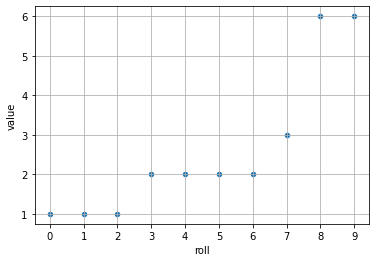

In [67]:
# your code here
df = df.sort_values(by= 'value', ignore_index= True)
df['roll'] = df.index.values
df.plot(x= 'roll', y= 'value', kind= 'scatter', grid= True, xticks= range(len(df)));

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

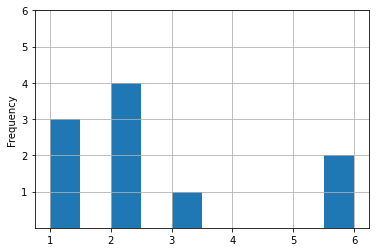

In [68]:
df['value'].plot(kind= 'hist', grid= True, xticks= range(1,7), yticks= range(1,7));

In [69]:
print("""
The histogram above presents the counting of each dice's face after 10 rollings. The scatter plot presented in point 2 
presents the number obtained in 10 dice rollings in a sorted way. So, the number of points in each y of plot of point 2
corresponds to the height of bins in histogram.
""")


The histogram above presents the counting of each dice's face after 10 rollings. The scatter plot presented in point 2 
presents the number obtained in 10 dice rollings in a sorted way. So, the number of points in each y of plot of point 2
corresponds to the height of bins in histogram.



## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [70]:
# your code here
def mean(dataframe):
    return np.sum(dataframe.values)/len(dataframe)

mean(df[['value']])

2.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [71]:
# your code here
# Frequency distribution
freq = df.groupby(by= 'value').agg('count')

# Mean computed through the dataframe obtained in the previous line
sum_i= 0
total_sum= 0
for i in range(len(freq)):
    sum_i += freq.iloc[i].values[0]*freq.index[i]
    total_sum += freq.iloc[i].values[0]
sum_i = sum_i/total_sum
sum_i

2.6

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [72]:
# your code here
def median(dataframe, q=0.5):
    if ((q != 0) & (q != 1)):
        if len(dataframe) % 2 == 0:
            return (dataframe.sort_values(by= dataframe.columns[0], ignore_index= True).loc[int(len(dataframe)//(1/q)-1)]+\
                    dataframe.sort_values(by= dataframe.columns[0], ignore_index= True).loc[int(len(dataframe)//(1/q))])/2
        else:
            return dataframe.sort_values(by= dataframe.columns[0], ignore_index= True).loc[int((len(dataframe)-1)//(1/q))]
    elif q == 0:
        return dataframe.sort_values(by= dataframe.columns[0], ignore_index= True).loc[q]
    else:
        return dataframe.sort_values(by= dataframe.columns[0], ignore_index= True).loc[len(dataframe)-1]
        
    
median(df[['value']]).value

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [73]:
# your code here
print("The first quartile is: ", median(df[['value']], q=0.25)[0])
print("The second quartile is: ", median(df[['value']])[0])
print("The third quartile is: ", median(df[['value']], q=0.75)[0])
print("The fourth quartile is: ", median(df[['value']], q=1)[0])

The first quartile is:  1.0
The second quartile is:  2.0
The third quartile is:  2.5
The fourth quartile is:  6


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

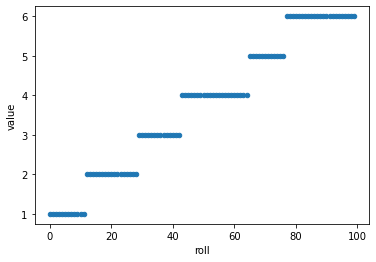

In [74]:
# your code here
data = pd.read_csv('../data/roll_the_dice_hundred.csv')
data = data.drop(columns= ['Unnamed: 0']).sort_values(by= 'value', ignore_index= True)
data['roll'] = data.index.values
data.plot(x= 'roll', y= 'value', kind= 'scatter');

In [75]:
print("""
The plot has a format of steps, because the column 'value' was sorted ascendingly. So, the values with same dice face were 
grouped together.
""")


The plot has a format of steps, because the column 'value' was sorted ascendingly. So, the values with same dice face were 
grouped together.



#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [76]:
# your code here
mean(data[['value']])

3.74

#### 3.- Now, calculate the frequency distribution.


In [77]:
# your code here
freq_dist= data.groupby('value').agg('count')
freq_dist

,roll
value,
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

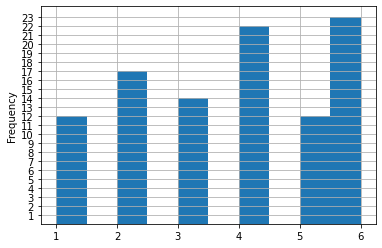

In [78]:
# your code here
data['value'].plot(kind= 'hist', grid= True, xticks= range(1,7), yticks= range(1,freq_dist.max().values[0]+1));

In [79]:
print("""
The frequency of each face is not the same. Actually, they range from 12 to 23, whose difference is almost twice. The 
frequency for 1 is 12, for 2 is 17, for 3 is 14, for 4 is 22, for 5 is 12 and for 6 is 23. The mean value is obtained by 
multiplying each face value by its frequency and dividing by the sum of frequencies""")


The frequency of each face is not the same. Actually, they range from 12 to 23, whose difference is almost twice. The 
frequency for 1 is 12, for 2 is 17, for 3 is 14, for 4 is 22, for 5 is 12 and for 6 is 23. The mean value is obtained by 
multiplying each face value by its frequency and dividing by the sum of frequencies


#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

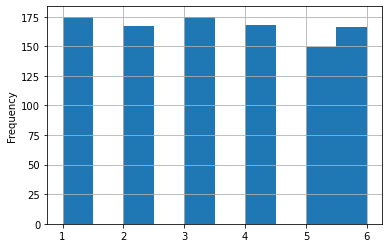

In [80]:
# your code here
data = pd.read_csv('../data/roll_the_dice_thousand.csv')
data = data.drop(columns= ['Unnamed: 0'])
freq_dist= data.groupby('value').agg('count')
data['value'].plot(kind= 'hist', grid= True, xticks= range(1,7));

In [81]:
print(f"""The difference of frequencies among each face value reduced. The values range from \
{data.groupby(by= 'value').agg('count').min().values[0]} to {data.groupby(by= 'value').agg('count').max().values[0]}, \
being the difference {(data.groupby(by= 'value').agg('count').max().values[0]-data.groupby(by= 'value').agg('count').min().values[0])/data.groupby(by= 'value').agg('count').min().values[0]*100:.2f} %. \
The frequency for 1 is {data.groupby(by= 'value').agg('count').iloc[0].values[0]}, for 2 is \
{data.groupby(by= 'value').agg('count').iloc[1].values[0]}, for 3 is \
{data.groupby(by= 'value').agg('count').iloc[2].values[0]}, for 4 is \
{data.groupby(by= 'value').agg('count').iloc[3].values[0]}, for 5 is \
{data.groupby(by= 'value').agg('count').iloc[4].values[0]} and for 6 is \
{data.groupby(by= 'value').agg('count').iloc[5].values[0]}.""")

The difference of frequencies among each face value reduced. The values range from 149 to 175, being the difference 17.45 %. The frequency for 1 is 175, for 2 is 167, for 3 is 175, for 4 is 168, for 5 is 149 and for 6 is 166.


## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

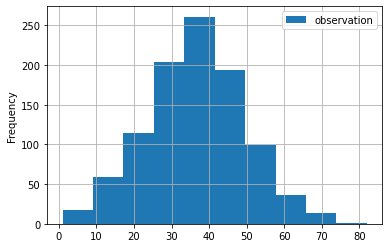

In [82]:
# your code here
data = pd.read_csv('../data/ages_population.csv')
data.plot(kind= 'hist', grid= True);

In [83]:
print("I would say that the mean is around 35 years (somewhere between 30 and 40 years) and the standard deviation would be \
12.5 years (half the value of: right edge of bar at right of the highest (~50) - left edge of bar at left of the highest \
(~25)).")

I would say that the mean is around 35 years (somewhere between 30 and 40 years) and the standard deviation would be 12.5 years (half the value of: right edge of bar at right of the highest (~50) - left edge of bar at left of the highest (~25)).


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [84]:
# your code here
print('The mean is: ', data.mean().values[0])
print('The standard deviation is: ', data.std().values[0])

The mean is:  36.56
The standard deviation is:  12.816499625976762


In [85]:
print("""
There are some differences: -4.3 % for the mean and -2.5 % for the standard deviation.
""")


There are some differences: -4.3 % for the mean and -2.5 % for the standard deviation.



#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

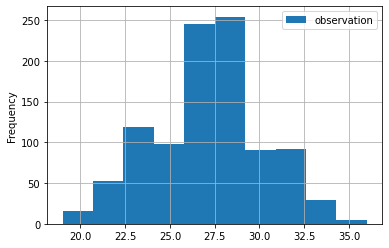

In [86]:
# your code here
data = pd.read_csv('../data/ages_population2.csv')
data.plot(kind= 'hist', grid= True);

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [87]:
print("""The range of ages is different. It seems there are two central bins, instead of one. The shape of the histogram is \
more similar to the normal in step 1, because there is a more slow reduction in frequencies in the bins around the central \
one.""")

The range of ages is different. It seems there are two central bins, instead of one. The shape of the histogram is more similar to the normal in step 1, because there is a more slow reduction in frequencies in the bins around the central one.


#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [88]:
# your code here
print('The mean is: ', data.mean().values[0])
print('The standard deviation is: ', data.std().values[0])

The mean is:  27.155
The standard deviation is:  2.969813932689186


In [89]:
print("""Now the mean is smaller (-25%) and the standard deviation is also smaller (~ -77%).""")

Now the mean is smaller (-25%) and the standard deviation is also smaller (~ -77%).


## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

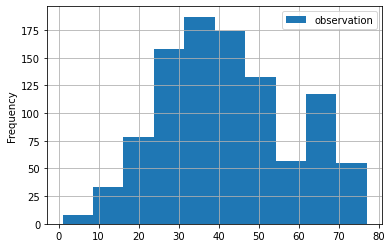

In [90]:
# your code here
data = pd.read_csv('../data/ages_population3.csv')
data.plot(kind= 'hist', grid= True);

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [91]:
# your code here
print('The mean is: ', data.mean().values[0])
print('The standard deviation is: ', data.std().values[0])

The mean is:  41.989
The standard deviation is:  16.144705959865934


In [92]:
print("""The mean is located in a bin which is not the highest and the standard deviation would be around 14. However, the \
existence of a bin with a high frequency far away from the central ones, increases the mean and the standard deviation.""")

The mean is located in a bin which is not the highest and the standard deviation would be around 14. However, the existence of a bin with a high frequency far away from the central ones, increases the mean and the standard deviation.


#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [93]:
# your code here
print("The first quartile is: ", median(data[['observation']], q=0.25)[0])
print("The second quartile is: ", median(data[['observation']])[0])
print("The third quartile is: ", median(data[['observation']], q=0.75)[0])
print("The fourth quartile is: ", median(data[['observation']], q=1)[0])

The first quartile is:  30.0
The second quartile is:  40.0
The third quartile is:  53.0
The fourth quartile is:  77.0


In [94]:
print(f"""The median  (second quartile) is lower than the mean, because median is a measure of central tendency which is \
less susceptible to values which are far away from the central values, when alll of them are sorted. The difference between \
the median and the mean is {median(data[['observation']])[0]-data.mean().values[0]:.3f}.""")

The median  (second quartile) is lower than the mean, because median is a measure of central tendency which is less susceptible to values which are far away from the central values, when alll of them are sorted. The difference between the median and the mean is -1.989.


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [95]:
# your code here
print("The percentile 10 is: ", median(data[['observation']], q=0.1)[0])
print("The percentile 90 is: ", median(data[['observation']], q=0.9)[0])
print("The percentile 20 is: ", median(data[['observation']], q=0.2)[0])
print("The percentile 80 is: ", median(data[['observation']], q=0.8)[0])
print("The percentile 30 is: ", median(data[['observation']], q=0.3)[0])
print("The percentile 70 is: ", median(data[['observation']], q=0.7)[0])
print("The percentile 40 is: ", median(data[['observation']], q=0.4)[0])
print("The percentile 60 is: ", median(data[['observation']], q=0.6)[0])

The percentile 10 is:  22.0
The percentile 90 is:  67.0
The percentile 20 is:  28.0
The percentile 80 is:  57.0
The percentile 30 is:  32.0
The percentile 70 is:  50.0
The percentile 40 is:  36.0
The percentile 60 is:  45.0


In [96]:
print("""The difference between the median and the values of percentiles 60, 70, 80, 90 is higher than the difference \
between the median and percentiles of 40, 30, 20 and 10. This is one more argument to support my reasoning in step 2.""")

The difference between the median and the values of percentiles 60, 70, 80, 90 is higher than the difference between the median and percentiles of 40, 30, 20 and 10. This is one more argument to support my reasoning in step 2.


## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [97]:
# your code here
# let's define a list where each the dataframe of each csv file of interest will be stored
lst= list()

# let's define each file to be read in a list
files = ['ages_population.csv', 'ages_population2.csv', 'ages_population3.csv']

# let's loop 
for file in files:
    df = pd.read_csv('../data/'+file, index_col=None, header=0)
    lst.append(df)
    
# concatenation of three dataframes in a single dataframe
# the first column corresponds to the first neighbourhood (n1), the second column corresponds to the second neighbourhood (n2)
# and the third column corresponds to the third neighbourhood (n3)
data = pd.concat(lst, axis=1, ignore_index=True)

# let's check some basic statistics about the three neighbourhoods
data.describe()

,0,1,2
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000


In [98]:
print("""There are 1000 persons in each neighbourhood. 

The range of: 
* n1 goes from 1 to 82 (81 years), 
* n2 goes from 19 to 36 (17 years),
* n3 goes from 1 to 77 (76 years).

The range of n2 is much lower than the range of n1 and n2. That is the reason for having a greater difference in standard \
deviations (n1: ~13, n2: ~3, n3: ~16).

The mean of n2 is also lower than the means of n1 and n3, because its population is younger than in the other 2 \
neighbourhoods. The means are:
* for n1 around 37 years,
* for n2 around 27 years,
* for n3 around 42 years.
Considering the medians:
* for n1 is 37,
* for n2 is 27,
* for n3 is 40.

As it can be seen, n3 is the only neighbourhood whose median differs a certain amount (2 years) from the mean. The reason for \
that is that there is an amount of persons whose age is above 40 years that increases the average of years. It can be \
observed either by the difference between median and third quartile of n1 (8 years) and n3 (13 years). Additionally, despite of \
n1 having a greater range than n3, the standard deviation is lower in n1 comparing to n3. All these points support the idea \
of n3 having a population older than n1.
""")

There are 1000 persons in each neighbourhood. 

The range of: 
* n1 goes from 1 to 82 (81 years), 
* n2 goes from 19 to 36 (17 years),
* n3 goes from 1 to 77 (76 years).

The range of n2 is much lower than the range of n1 and n2. That is the reason for having a greater difference in standard deviations (n1: ~13, n2: ~3, n3: ~16).

The mean of n2 is also lower than the means of n1 and n3, because its population is younger than in the other 2 neighbourhoods. The means are:
* for n1 around 37 years,
* for n2 around 27 years,
* for n3 around 42 years.
Considering the medians:
* for n1 is 37,
* for n2 is 27,
* for n3 is 40.

As it can be seen, n3 is the only neighbourhood whose median differs a certain amount (2 years) from the mean. The reason for that is that there is an amount of persons whose age is above 40 years that increases the average of years. It can be observed either by the difference between median and third quartile of n1 (8 years) and n3 (13 years). Additionally, despite of 